# Исследовательский анализ сотрудников компании по группам риска
Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 

Необходимо обосновать, что:
* Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.
* Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.linewidth'] = 0.5

In [3]:
# Загрузка данных
data = pd.read_csv('data.csv')
# Первые пять строк таблицы данных
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
Количество больничных дней    237 non-null int64
Возраст                       237 non-null int64
Пол                           237 non-null object
dtypes: int64(2), object(1)
memory usage: 5.6+ KB


## Группа риска и гендерная группа
Посмотрим на соотношени мужчин и женщин в компании.

In [5]:
print('Количество мужчин: {} человек'.format(
    len(data[data['Пол']=='М'])))
print('Количество женщин: {} человек'.format(
    len(data[data['Пол']=='Ж'])))

Количество мужчин: 139 человек
Количество женщин: 98 человек


In [6]:
print('Количество мужчин: {:.2f}%'.format(
    len(data[data['Пол']=='М'])/len(data['Пол'])*100))
print('Количество женщин: {:.2f}%'.format(
    len(data[data['Пол']=='Ж'])/len(data['Пол'])*100))

Количество мужчин: 58.65%
Количество женщин: 41.35%


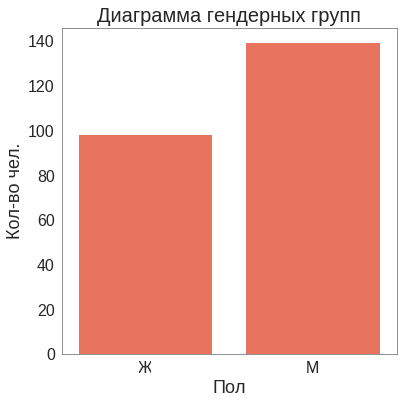

In [7]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

sns.countplot(data['Пол'], color='tomato')

plt.xlabel('Пол', fontsize=18)
plt.ylabel('Кол-во чел.', fontsize=18)
plt.title('Диаграмма гендерных групп', fontsize=20)
plt.show()

### Тест Стюдента для гендерных групп
Перед тем как найти отношение пропущенных дней больше 2-х для каждой из групп, необходимо определить существует ли разница в общем количестве пропущенных дней для этих групп. Для этого посмотрим на сводную статистику данных по каждой группе.

In [8]:
data['Количество больничных дней'][data['Пол'] == 'М'].describe()

count    139.000000
mean       3.179856
std        1.889144
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: Количество больничных дней, dtype: float64

In [9]:
data['Количество больничных дней'][data['Пол'] == 'Ж'].describe()

count    98.000000
mean      3.367347
std       1.689188
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       8.000000
Name: Количество больничных дней, dtype: float64

Видно что математическое ожидание общего количества больничных дней для мужской группы составляет 3.179856, в то время как математическое ожидание количества больничных дней для женской группы составляет 3.367347. Для того чтобы понять, является ли эта разница статистически значимой, мы проведем тест Стьюдента для двух независимых выборок с разной дисперсией.

In [10]:
from scipy import stats
import math

male_sample = data['Количество больничных дней'][
    data['Пол'] == 'М']
female_sample = data['Количество больничных дней'][
    data['Пол'] == 'Ж']

# Degrees of freedom
df = len(male_sample) + len(female_sample) - 2
t_critical = stats.t.ppf(q=0.975, df=df)

print('t-critical value: {:.2f}'.format(t_critical))

t-critical value: 1.97


t-критическое значение для двухстороннего теста с альфа-значением 0.95 составляет 1.98. 

In [11]:
t_stat, p_val = stats.ttest_ind(a=male_sample, b=female_sample, equal_var=False)

print('t-statistic: {:.2f}'.format(t_stat))
print('p-value: {:.2f}'.format(p_val))

t-statistic: -0.80
p-value: 0.42


По результатам теста видно, что p-значение теста довольно высоко (42%), а абсолютная величина t-значения достаточно мала, что указывает на то, что мы можем отвергнуть конкурирующую гипотезу и принять основную гипотезу что между средними математическими ожиданиями количества больничных дней двух групп не существует статистической разницы. Из этого следует что общее количество пропущенных дней можно принять как равное для двух групп.

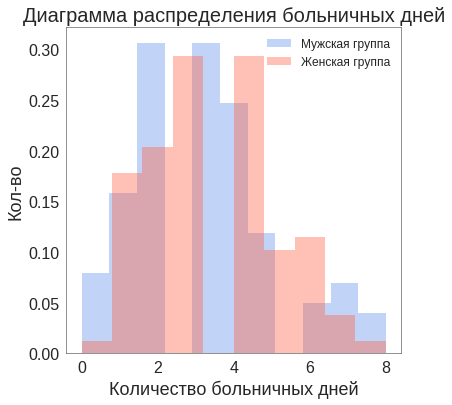

In [12]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

sns.distplot(male_sample, kde=False, 
             color='cornflowerblue', norm_hist=True, label='Мужская группа')
sns.distplot(female_sample, kde=False,
             color='tomato', norm_hist=True, label='Женская группа')

plt.xlabel('Количество больничных дней', fontsize=18)
plt.ylabel('Кол-во', fontsize=18)
plt.title('Диаграмма распределения больничных дней', fontsize=20)
plt.legend(fontsize=12)
plt.show()

Теперь расчитаем отношение пропущенных по болезни дней более 2-х к общему количеству пропущенных дней.

In [13]:
print('Для мужской гендерной группы.')
print('Кол-во пропущенные дней равное или менее 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] <= 2) & (data['Пол'] == 'М')])))
print('Кол-во пропущенные дней более 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] > 2) & (data['Пол'] == 'М')])))
print('Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: {:.2f}'.format(84/(55+84)))

Для мужской гендерной группы.
Кол-во пропущенные дней равное или менее 2-х: 55
Кол-во пропущенные дней более 2-х: 84
Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: 0.60


In [14]:
print('Для женской гендерной группы.')
print('Кол-во пропущенные дней равное или менее 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] <= 2) & (data['Пол'] == 'Ж')])))
print('Кол-во пропущенные дней более 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] > 2) & (data['Пол'] == 'Ж')])))
print('Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: {:.2f}'.format(67/(31+67)))

Для женской гендерной группы.
Кол-во пропущенные дней равное или менее 2-х: 31
Кол-во пропущенные дней более 2-х: 67
Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: 0.68


Из результатов видно, что отношение пропущенных дней более 2-х в женской гендерной группе выше чем в мужской.

## Группа риска и возрастная группа
Посмотрим на распределение возрастов работников компании по двум группам.

In [15]:
print('Количество работников младше 35 лет включительно: {} человек'.format(
    len(data[data['Возраст'] <= 35])))
print('Количество работников старше 35 лет: {} человек'.format(
    len(data[data['Возраст'] > 35])))

Количество работников младше 35 лет включительно: 57 человек
Количество работников старше 35 лет: 180 человек


In [16]:
print('Количество работников младше 35 лет включительно: {:.2f}%'.format(
    len(data[data['Возраст'] <= 35])/len(data['Возраст'])*100))
print('Количество работников старше 35 лет: {:.2f}%'.format(
    len(data[data['Возраст'] > 35])/len(data['Возраст'])*100))

Количество работников младше 35 лет включительно: 24.05%
Количество работников старше 35 лет: 75.95%


Создадим дополнительную графу данных, в которой значения возраста меньше или равные 35 годам отнесем в одну группу, а значения возраста которые больше 35 лет в другую группу.

In [17]:
data['Возрастная группа'] = data['Возраст'].apply(
    lambda x: 'Младше 35 лет' if x <= 35 else 'Старше 35 лет')

In [18]:
data.head()

,Количество больничных дней,Возраст,Пол,Возрастная группа
0,5,39,Ж,Старше 35 лет
1,4,54,М,Старше 35 лет
2,4,26,М,Младше 35 лет
3,5,42,М,Старше 35 лет
4,4,29,М,Младше 35 лет


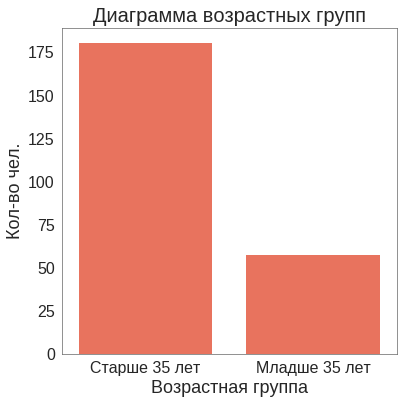

In [19]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

sns.countplot(data['Возрастная группа'], color='tomato')

plt.xlabel('Возрастная группа', fontsize=18)
plt.ylabel('Кол-во чел.', fontsize=18)
plt.title('Диаграмма возрастных групп', fontsize=20)
plt.show()

### Тест Стюдента для возрастных групп
Как и предыдущем случае, перед тем как найти отношение пропущенных дней больше 2-х для каждой из групп, необходимо определить существует ли разница в общем количестве пропущенных дней для этих групп. Для этого посмотрим на сводную статистику данных по каждой группе.

In [20]:
data['Количество больничных дней'][data['Возрастная группа'] == 'Младше 35 лет'].describe()

count    57.000000
mean      3.350877
std       1.894458
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       8.000000
Name: Количество больничных дней, dtype: float64

In [21]:
data['Количество больничных дней'][data['Возрастная группа'] == 'Старше 35 лет'].describe()

count    180.000000
mean       3.227778
std        1.783946
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: Количество больничных дней, dtype: float64

Видно что математическое ожидание общего количества больничных дней для группы младше 35 лет составляет 3.350877, в то время как математическое ожидание количества больничных дней для группы старше 35 лет составляет 3.227778. Для того чтобы понять, является ли эта разница статистически значимой, мы проведем тест Стьюдента для двух независимых выборок с разной дисперсией.

In [22]:
junior_sample = data['Количество больничных дней'][
    data['Возрастная группа'] == 'Младше 35 лет']
senior_sample = data['Количество больничных дней'][
    data['Возрастная группа'] == 'Старше 35 лет']

# Degrees of freedom
df = len(junior_sample) + len(senior_sample) - 2
t_critical = stats.t.ppf(q=0.975, df=df)

print('t-critical value: {:.2f}'.format(t_critical))

t-critical value: 1.97


t-критическое значение для двухстороннего теста с альфа-значением 0.95 составляет 1.97. 

In [23]:
t_stat, p_val = stats.ttest_ind(a=junior_sample, b=senior_sample, equal_var=False)

print('t-statistic: {:.2f}'.format(t_stat))
print('p-value: {:.2f}'.format(p_val))

t-statistic: 0.43
p-value: 0.67


По результатам теста видно, что p-значение теста довольно высоко (67%), а абсолютная величина t-значения достаточно мала, что указывает на то, что мы можем отвергнуть конкурирующую гипотезу и принять основную гипотезу что между средними математическими ожиданиями количества больничных дней двух групп не существует статистической разницы. Из этого следует что общее количество пропущенных дней можно принять как равное для двух групп.

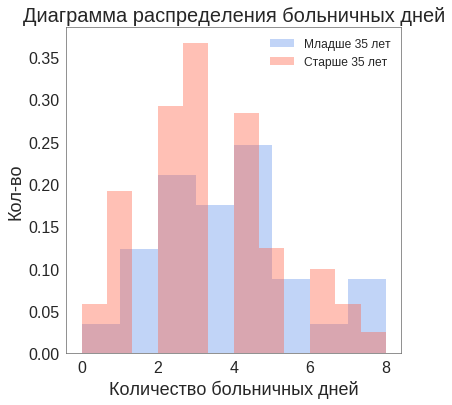

In [24]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

sns.distplot(junior_sample, kde=False, 
             color='cornflowerblue', norm_hist=True, label='Младше 35 лет')
sns.distplot(senior_sample, kde=False,
             color='tomato', norm_hist=True, label='Старше 35 лет')

plt.xlabel('Количество больничных дней', fontsize=18)
plt.ylabel('Кол-во', fontsize=18)
plt.title('Диаграмма распределения больничных дней', fontsize=20)
plt.legend(fontsize=12)
plt.show()

Теперь расчитаем отношение пропущенных по болезни дней более 2-х к общему количеству пропущенных дней.

In [25]:
print('Для группы младше 35 лет включительно.')
print('Кол-во пропущенные дней равное или менее 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] <= 2) & (data['Возрастная группа'] == 'Младше 35 лет')])))
print('Кол-во пропущенные дней более 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] > 2) & (data['Возрастная группа'] == 'Младше 35 лет')])))
print('Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: {:.2f}'.format(36/(21+36)))

Для группы младше 35 лет включительно.
Кол-во пропущенные дней равное или менее 2-х: 21
Кол-во пропущенные дней более 2-х: 36
Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: 0.63


In [26]:
print('Для группы старше 35 лет.')
print('Кол-во пропущенные дней равное или менее 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] <= 2) & (data['Возрастная группа'] == 'Старше 35 лет')])))
print('Кол-во пропущенные дней более 2-х: {}'.format(
    len(data[(data['Количество больничных дней'] > 2) & (data['Возрастная группа'] == 'Старше 35 лет')])))
print('Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: {:.2f}'.format(115/(65+115)))

Для группы старше 35 лет.
Кол-во пропущенные дней равное или менее 2-х: 65
Кол-во пропущенные дней более 2-х: 115
Отношение пропущенных дней более 2-х к общему кол-ву пропущенных дней: 0.64


Из результатов видно, что отношение пропущенных дней более 2-х в возрастное группе старше 35 лет несколько выше, чем в возрастной группе младше 35 лет включительно.

## Вывод
Результаты исследования показали, что в количестве пропущенных дней между гендерными и возрастными группами не существует статистической разницы. Отношение пропущенных дней больше 2-х для гендерных групп несколько выше для женской группы, в то время как отношение пропущенных дней больше 2-х для возрастных групп несколько выше для возрастной группы старше 35 лет. 